In [21]:
import os
import urllib.request
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
import sklearn.linear_model

In [22]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)

    full_country_stats = pd.merge(
        left=oecd_bli, 
        right=gdp_per_capita,
        left_index=True, 
        right_index=True
    )

    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [23]:
datapath = os.path.join("datasets", "lifesat", "")

In [24]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [58]:
# load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=',', delimiter='\t',
                            encoding='latin1', na_values='n/a')

# prepare the data (x and y are created to have dimension (n, 1) which is necessary)
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

<Axes: xlabel='GDP per capita', ylabel='Life satisfaction'>

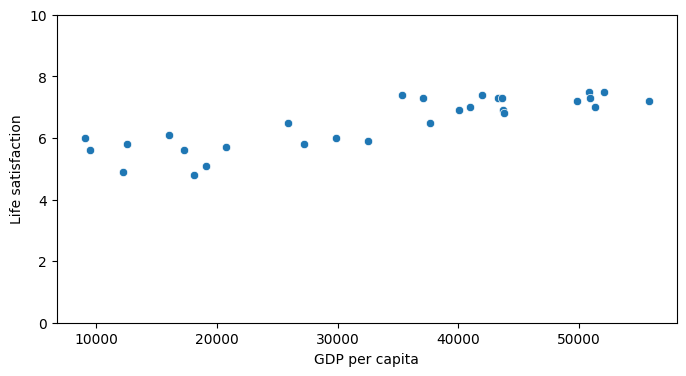

In [64]:
# plot the data
plt.figure(figsize=(8,4))
plt.ylim(0,10)
sb.scatterplot(x="GDP per capita", y="Life satisfaction", data=country_stats )

[[5.96242338]]


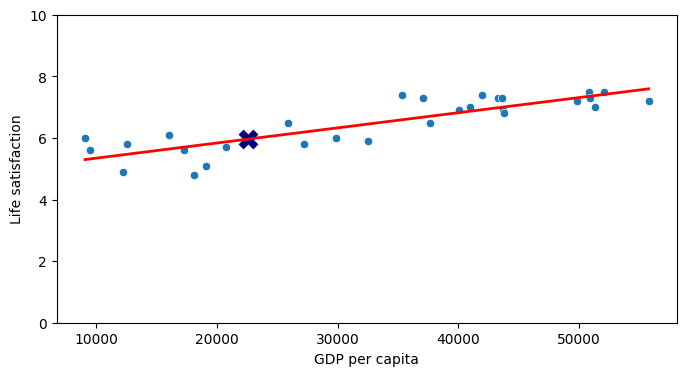

In [92]:
# define the model
model = sklearn.linear_model.LinearRegression()

# train the model
model.fit(X, y)

# predict using model
X_new = [[22587]]
y_new = model.predict(X_new)
print(y_new)

# plot the data 
plt.figure(figsize=(8,4))
plt.ylim(0,10)
sb.scatterplot(x="GDP per capita", y="Life satisfaction", data=country_stats)

# create a line (y_fit) to visualize the model
X_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_fit = model.predict(X_fit)

# visualize the model and prediction
plt.plot(X_fit, y_fit, color="red", linewidth=2)
plt.scatter(X_new, y_new, color="navy", s=200, marker='X', linewidths=0.1);